In [1]:
from google.colab import files
uploaded = files.upload()


Saving churn_data.csv to churn_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('churn_data.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,Churn,TotalCharges
0,ID0000,Male,0,No,Yes,29,No,No,118.48,Yes,3435.92
1,ID0001,Female,1,No,No,16,Yes,No,103.89,Yes,1662.24
2,ID0002,Male,0,Yes,No,61,No,Fiber optic,32.47,No,1980.67
3,ID0003,Male,0,Yes,No,12,No,Fiber optic,112.08,Yes,1344.96
4,ID0004,Male,1,No,Yes,58,No,DSL,106.99,Yes,6205.42


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load data
df = pd.read_csv('churn_data.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,MonthlyCharges,Churn,TotalCharges
0,ID0000,Male,0,No,Yes,29,No,No,118.48,Yes,3435.92
1,ID0001,Female,1,No,No,16,Yes,No,103.89,Yes,1662.24
2,ID0002,Male,0,Yes,No,61,No,Fiber optic,32.47,No,1980.67
3,ID0003,Male,0,Yes,No,12,No,Fiber optic,112.08,Yes,1344.96
4,ID0004,Male,1,No,Yes,58,No,DSL,106.99,Yes,6205.42


In [5]:
# Drop customer ID
df.drop('customerID', axis=1, inplace=True)

# Encode categorical columns
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        df[column] = LabelEncoder().fit_transform(df[column])

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.44      0.40      0.42        20
           1       0.45      0.50      0.48        20

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.45      0.45      0.45        40



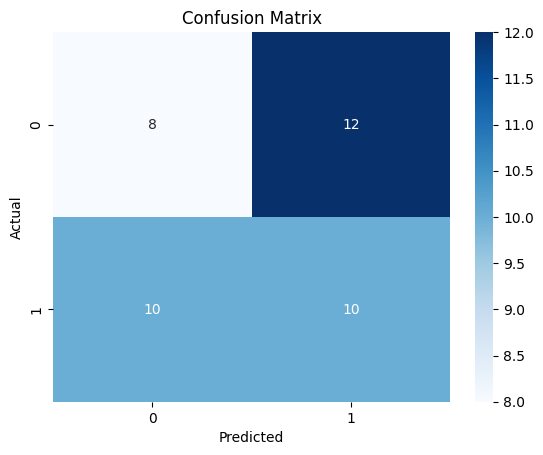

In [8]:
# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


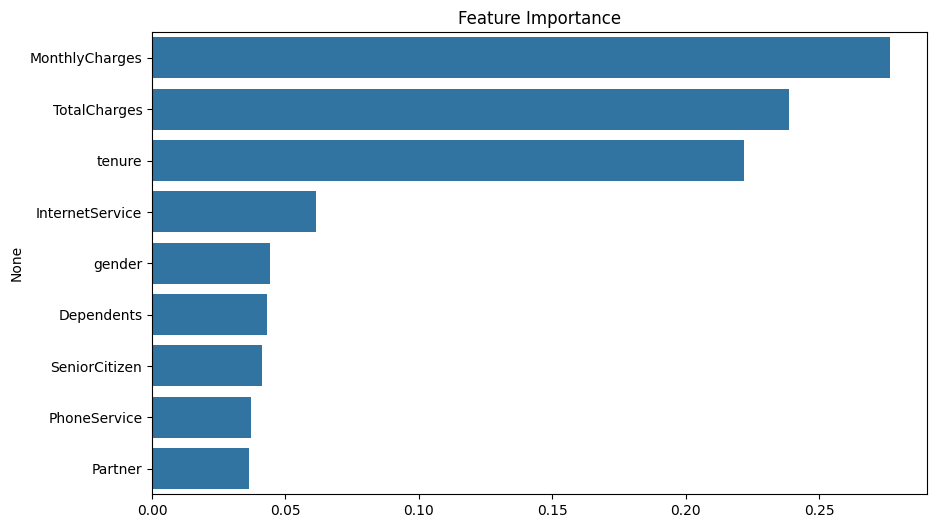

In [9]:
importances = model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=features[sorted_indices])
plt.title('Feature Importance')
plt.show()
